In [1]:
# Date
from datetime import date

#Data Manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# API
import yfinance as yf
import yahoo_fin.stock_info as si

In [2]:
company = "LMT"

In [3]:
valuation = si.get_stats_valuation(company).iloc[:,:2]
valuation

,0,1
0,Market Cap (intraday) 5,106.76B
1,Enterprise Value 3,116.49B
2,Trailing P/E,15.50
3,Forward P/E 1,13.77
4,PEG Ratio (5 yr expected) 1,2.73
5,Price/Sales (ttm),1.62
6,Price/Book (mrq),16.92
7,Enterprise Value/Revenue 3,1.76
8,Enterprise Value/EBITDA 7,11.41


In [4]:
CF = si.get_cash_flow(company).transpose()
BS = si.get_balance_sheet(company).transpose()
IS = si.get_income_statement(company).transpose()
print(CF.info())
print(BS.info())
print(IS.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2020-12-31 to 2017-12-31
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   changeToLiabilities                    4 non-null      int64
 1   totalCashflowsFromInvestingActivities  4 non-null      int64
 2   netBorrowings                          4 non-null      int64
 3   totalCashFromFinancingActivities       4 non-null      int64
 4   changeToOperatingActivities            4 non-null      int64
 5   netIncome                              4 non-null      int64
 6   changeInCash                           4 non-null      int64
 7   repurchaseOfStock                      4 non-null      int64
 8   totalCashFromOperatingActivities       4 non-null      int64
 9   depreciation                           4 non-null      int64
 10  otherCashflowsFromInvestingActivities  4 non-null      int64
 11  dividendsPaid  

In [5]:
Profitability = pd.DataFrame()
Profitability["Gross_Profit_Margin"] = (IS["grossProfit"]/IS["totalRevenue"])
Profitability["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Profitability["Operating_Profit_Margin"] = (IS["operatingIncome"]/IS["totalRevenue"])
Profitability["Operating_ROA"] = (IS["operatingIncome"]/BS["totalAssets"])
Profitability["ROA"] = (IS["netIncome"]/BS["totalAssets"])
Profitability["ROE"] = (IS["netIncome"]/BS["totalStockholderEquity"])

Profitability

,Gross_Profit_Margin,Net_Profit_Margin,Operating_Profit_Margin,Operating_ROA,ROA,ROE
endDate,,,,,,
2020-12-31,0.132741,0.104483,0.135738,0.175054,0.134747,1.135993
2019-12-31,0.139888,0.10416,0.128703,0.161968,0.131081,1.992325
2018-12-31,0.137086,0.093858,0.123582,0.148052,0.112443,3.619799
2017-12-31,0.127522,0.039291,0.11195,0.11997,0.042106,-2.309412


In [6]:
Dupont = pd.DataFrame()
Dupont["ROE"] = (IS["operatingIncome"]/BS["totalStockholderEquity"])
Dupont["Net_Profit_Margin"] = (IS["netIncome"]/IS["totalRevenue"])
Dupont["Total Asset Turnover"] = (IS["totalRevenue"]/BS["totalAssets"])
Dupont["Leverage"] = (BS["totalAssets"]/BS["totalStockholderEquity"])
Dupont['date'] = pd.date_range(start='12/31/2017', periods=len(Dupont), freq='Y')[::-1]
Dupont

,ROE,Net_Profit_Margin,Total Asset Turnover,Leverage,date
endDate,,,,,
2020-12-31,1.47581,0.104483,1.289647,8.430590,2020-12-31
2019-12-31,2.461784,0.10416,1.258458,15.199232,2019-12-31
2018-12-31,4.766141,0.093858,1.198012,32.192253,2018-12-31
2017-12-31,-6.58,0.039291,1.071643,-54.847059,2017-12-31


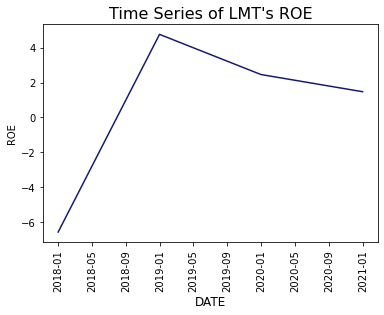

In [7]:
plt.plot(Dupont['date'], Dupont['ROE'], label='ROE', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("ROE")
plt.title(f"Time Series of {company}'s ROE", fontsize = "16")
plt.show()

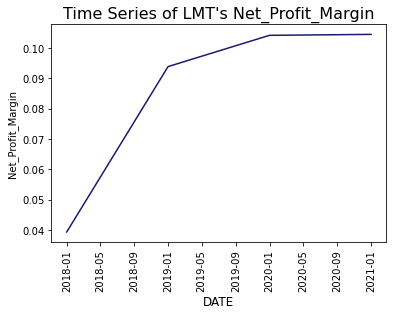

In [8]:
plt.plot(Dupont['date'], Dupont['Net_Profit_Margin'], label='Net_Profit_Margin', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Net_Profit_Margin")
plt.title(f"Time Series of {company}'s Net_Profit_Margin", fontsize = "16")
plt.show()

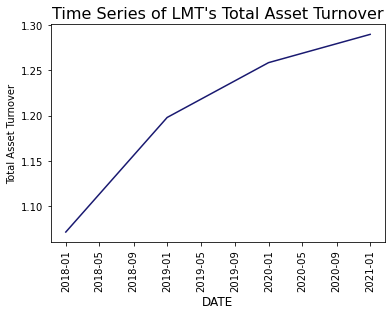

In [9]:
plt.plot(Dupont['date'], Dupont['Total Asset Turnover'], label='Total Asset Turnover', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Total Asset Turnover")
plt.title(f"Time Series of {company}'s Total Asset Turnover", fontsize = "16")
plt.show()

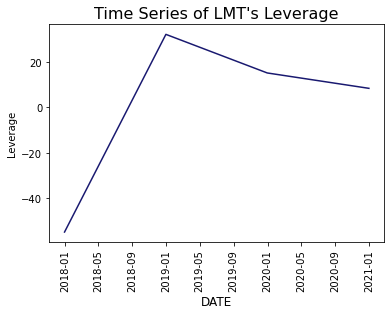

In [10]:
plt.plot(Dupont['date'], Dupont['Leverage'], label='Leverage', color= "midnightblue")
plt.xticks(rotation=90)

plt.xlabel("DATE", fontsize = "12")
plt.ylabel("Leverage")
plt.title(f"Time Series of {company}'s Leverage", fontsize = "16")
plt.show()